# This notebook focuses on a failed attempt in implementing auto_ts and implementing ARIMA for 13 cities. 

In [18]:
import pandas as pd

file_path = "C:\\Users\\Acer\\Downloads\\fahim_vai - Sheet1 (10).csv"

try:
  df = pd.read_csv(file_path)
  df.head()
except FileNotFoundError:
  print(f"File not found at: {file_path}")

In [19]:
df.shape

(7329, 6)

In [20]:
def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)

The following dates are not in the correct format:
117    11/9/2024
118    11/9/2024
119    11/9/2024
120    11/9/2024
121    11/9/2024
         ...    
580    10/5/2024
581    10/5/2024
582    10/5/2024
583    10/5/2024
584    10/5/2024
Name: Date, Length: 130, dtype: object


In [21]:
# Function to add leading zeros to dates
def format_date(date_str):
    # Split the date string by '/'
    parts = date_str.split('/')

    # Ensure month and day are 2 digits
    month = parts[0].zfill(2)  # Adds leading zero if month is 1 digit
    day = parts[1].zfill(2)    # Adds leading zero if day is 1 digit
    year = parts[2]            # Year remains unchanged

    # Return the date in MM/DD/YYYY format
    return f"{month}/{day}/{year}"

# Apply the formatting function to the entire 'Date' column
def fix_date_column(df):
    df['Date'] = df['Date'].apply(format_date)
    return df


df = fix_date_column(df)


def check_date_format(df):
    # Define the regex pattern for MM/DD/YYYY
    pattern = r'^\d{2}/\d{2}/\d{4}$'

    # Check which rows match the format
    correct_format = df['Date'].str.match(pattern)

    # Display the rows that do not match the pattern
    if correct_format.all():
        print("All dates are in MM/DD/YYYY format")
    else:
        print("The following dates are not in the correct format:")
        print(df[~correct_format]['Date'])


check_date_format(df)


All dates are in MM/DD/YYYY format


In [22]:
import pandas as pd

# Dictionary of correct city names mapping to incorrect ones
city_corrections = {
    'Narsingdi': ['Norshindi', 'Narshindi', 'Narsindi'],
    'Chittagong': ['Chittgong', 'Chattogram'],
    'Narayanganj': ['Narayangonj'],
    'Barishal': ['Barisal']
}

# Replace the incorrect city names with the correct ones
for correct_city, wrong_cities in city_corrections.items():
    df['City'] = df['City'].replace(wrong_cities, correct_city)

# Print the unique cities after corrections
unique_cities_after_correction = df['City'].unique()
print("Unique cities after correction:")
for city in unique_cities_after_correction:
    print(city)


Unique cities after correction:
Dhaka
Chittagong
Gazipur
Narayanganj
Sylhet
Khulna
Rajshahi
Barishal
Savar
Mymensingh
Rangpur
Cumilla
Narsingdi


In [23]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Sort the data by Date for correct plotting
df = df.sort_values(by='Date')

# Filter out rows where AQI is not available (if needed)
df = df[df['AQI'] != 'DNA']
df['AQI'] = pd.to_numeric(df['AQI'], errors='coerce')

In [24]:
df.shape

(6537, 6)

# In the below, basically I wanted to implement auto_ts for 13 cities using label encoding but it only showed just the outcome for barishal. 

City Encoding Mapping:
{'Barishal': 0, 'Chittagong': 1, 'Cumilla': 2, 'Dhaka': 3, 'Gazipur': 4, 'Khulna': 5, 'Mymensingh': 6, 'Narayanganj': 7, 'Narsingdi': 8, 'Rajshahi': 9, 'Rangpur': 10, 'Savar': 11, 'Sylhet': 12}

### Processing City: Barishal ###
Start of Fit.....
    Target variable given as = AQI
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['AQI']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (317, 1)
Alert: Could not detect strf_time_format of Date. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is already stationary
There is no differencing needed in this datasets for VAR model
    No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running 

01:01:19 - cmdstanpy - INFO - Chain [1] start processing
01:01:19 - cmdstanpy - INFO - Chain [1] done processing
01:01:19 - cmdstanpy - INFO - Chain [1] start processing
01:01:19 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 50.21
    Std Deviation of actuals = 4.50
    Normalized RMSE (as pct of std dev) = 1116%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 297 Test Shape: 5
Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2590.535, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2590.722, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2589.986, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2588.537, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2575.795, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2576.503, Time=0.22 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2576.487, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2583.581, Time=0.12 sec
 ARIMA(2,1,0)(0,0,

TypeError: auto_timeseries.predict() got an unexpected keyword argument 'future_reg'

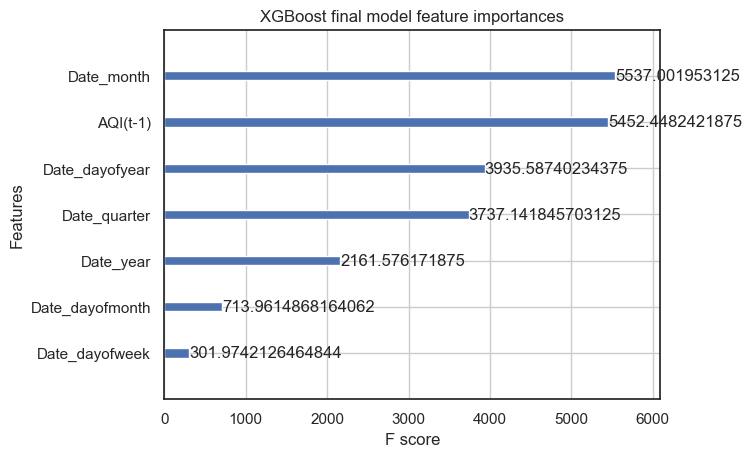

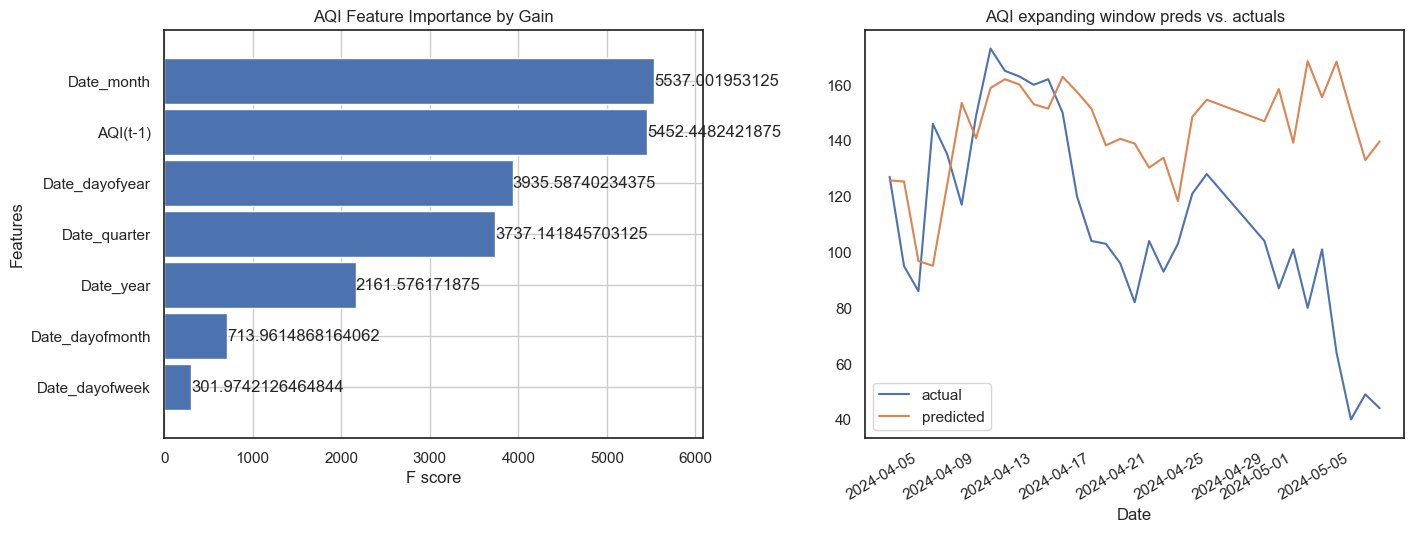

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from auto_ts import auto_timeseries

# Step 1: Load the dataset
# Assuming `data.csv` is your merged dataset file
#df = pd.read_csv("data.csv")

# Step 2: Encode city names
label_encoder = LabelEncoder()
df['City_Encoded'] = label_encoder.fit_transform(df['City'])

# Print city encoding mapping
print("City Encoding Mapping:")
city_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(city_mapping)

# Step 3: Process each city individually
results = []
for city, city_data in df.groupby('City'):
    print(f"\n### Processing City: {city} ###")
    
    # Sort by date
    city_data = city_data.sort_values('Date')
    
    # Split into training and testing sets
    train_data = city_data.iloc[:-75]
    test_data = city_data.iloc[-75:]
    
    # Prepare data for auto_timeseries
    model = auto_timeseries(
        score_type='rmse',  # Root Mean Squared Error for evaluation
        time_interval='D',  # Daily data
        non_seasonal_pdq=None,
        seasonality=False,
        model_type=['best'],  # Use the best model
        verbose=0,
    )
    
    # Fit the model
    model.fit(
        traindata=train_data[['Date', 'AQI']],  # Use 'Date' and 'AQI'
        ts_column='Date',
        target='AQI',
    )
    
    # Predict on test data
    predictions = model.predict(
        future_reg=test_data[['Date']],  # Future data for prediction
    )
    
    # Store the forecast for comparison
    results.append((city, predictions))
    
    print(f"\nForecast for {city}:")
    print(predictions.head())

# Display the results for comparison
print("\n### All Cities Forecast Comparison ###")
for city, forecast in results:
    print(f"\n### City: {city} ###")
    print(forecast.head())


# Thus chatgpt suggested me to use ARIMA for 13 cities, it is kind of same as your code hehe, sorry for the pain.  

In [26]:
for city, city_data in df.groupby('City'):
    print(f"\nCity: {city}")
    print(city_data[['Date', 'AQI']].head())



City: Barishal
           Date  AQI
7323 2023-02-13  168
7310 2023-02-14  139
7297 2023-02-15  156
7271 2023-02-20  159
7258 2023-02-21  121

City: Chittagong
           Date  AQI
7317 2023-02-13  145
7304 2023-02-14  161
7291 2023-02-15  122
7278 2023-02-19  189
7265 2023-02-20  246

City: Cumilla
           Date  AQI
7327 2023-02-13  182
7314 2023-02-14  168
7301 2023-02-15  165
7288 2023-02-19  198
7275 2023-02-20  199

City: Dhaka
           Date  AQI
7316 2023-02-13  152
7303 2023-02-14  178
7290 2023-02-15  189
7277 2023-02-19  277
7264 2023-02-20  246

City: Gazipur
           Date  AQI
7318 2023-02-13  216
7305 2023-02-14  176
7292 2023-02-15  186
7279 2023-02-19  308
7266 2023-02-20  280

City: Khulna
           Date  AQI
7321 2023-02-13  179
7308 2023-02-14  162
7295 2023-02-15  168
7282 2023-02-19  168
7269 2023-02-20  166

City: Mymensingh
           Date  AQI
7325 2023-02-13  235
7312 2023-02-14  199
7299 2023-02-15  172
7286 2023-02-19  287
7273 2023-02-20  267

City: Na

In [27]:
df['AQI'] = df['AQI'].interpolate(method='linear')


In [28]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [29]:
if len(city_data) > 75:
    train_data = city_data.iloc[:-75]
    test_data = city_data.iloc[-75:]
else:
    train_data = city_data.iloc[:-50]  # Use a smaller test set
    test_data = city_data.iloc[-50:]


In [30]:
from statsmodels.tsa.arima.model import ARIMA

for city, city_data in df.groupby('City'):
    try:
        city_data = city_data.sort_values('Date')
        model = ARIMA(city_data['AQI'], order=(1, 1, 1))
        model_fit = model.fit()
        predictions = model_fit.forecast(steps=75)
        print(f"\nPredictions for {city}:")
        print(predictions.head())
    except Exception as e:
        print(f"Error processing city {city}: {e}")



Predictions for Barishal:
392    89.942943
393    86.662522
394    84.534573
395    83.154212
396    82.258797
Name: predicted_mean, dtype: float64

Predictions for Chittagong:
481    44.676112
482    46.439728
483    47.285824
484    47.691739
485    47.886477
Name: predicted_mean, dtype: float64

Predictions for Cumilla:
538    174.259175
539    162.492502
540    155.104642
541    150.466077
542    147.553693
Name: predicted_mean, dtype: float64

Predictions for Dhaka:
563    188.475200
564    181.997550
565    178.356711
566    176.310334
567    175.160143
Name: predicted_mean, dtype: float64

Predictions for Gazipur:
499    208.839040
500    191.325328
501    184.050112
502    181.027979
503    179.772581
Name: predicted_mean, dtype: float64

Predictions for Khulna:
522    177.476122
523    169.463473
524    165.578033
525    163.693931
526    162.780305
Name: predicted_mean, dtype: float64

Predictions for Mymensingh:
498    171.191233
499    167.427610
500    164.989080
501    1

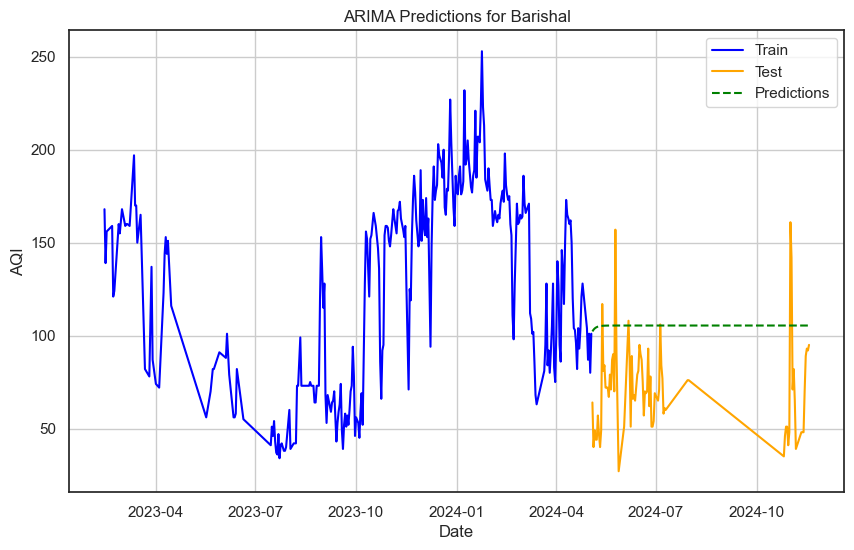

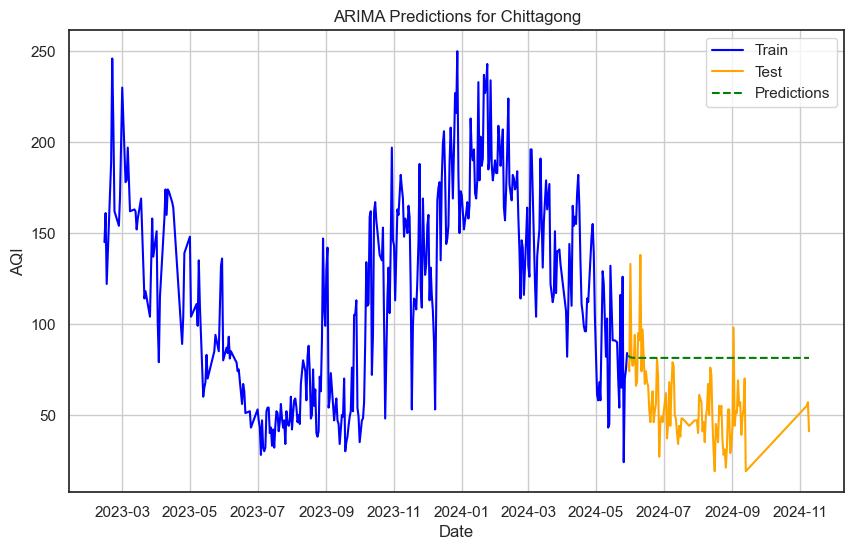

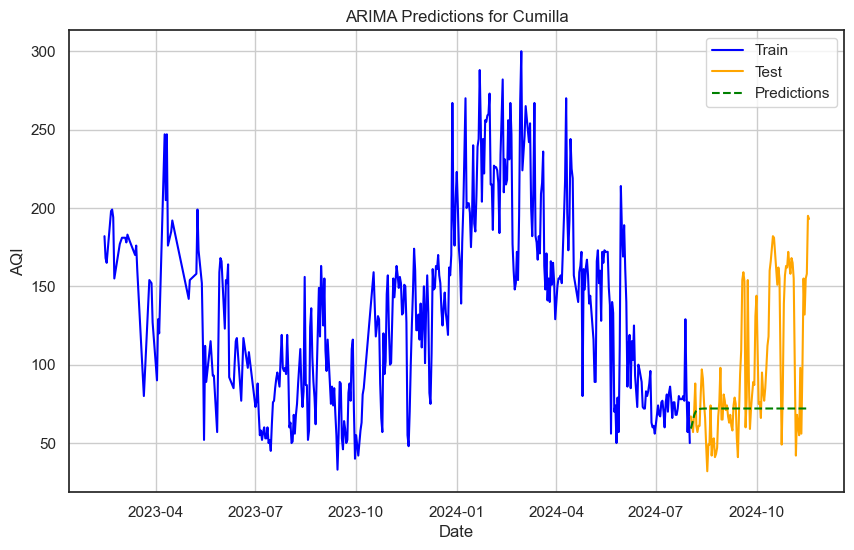

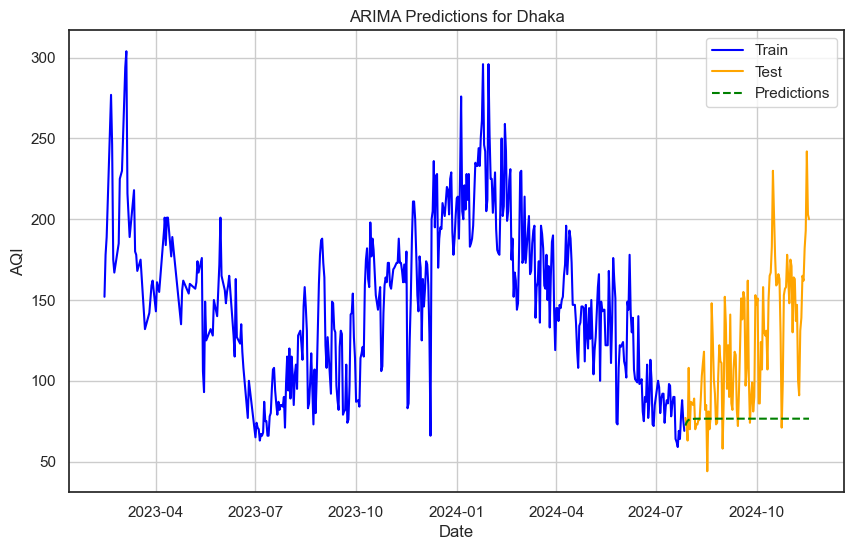

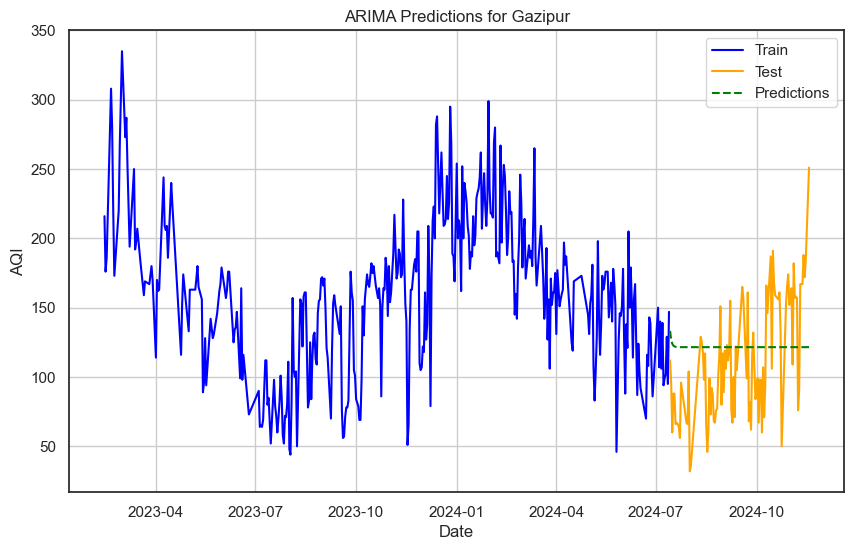

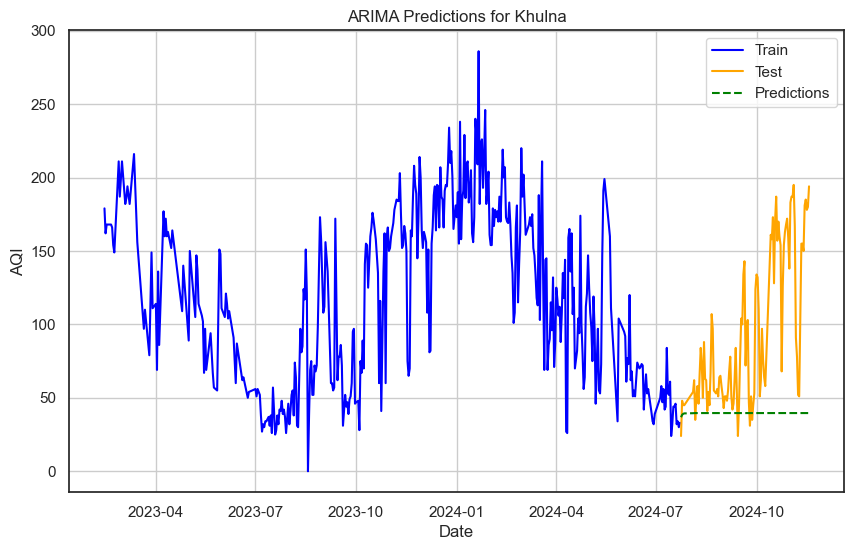

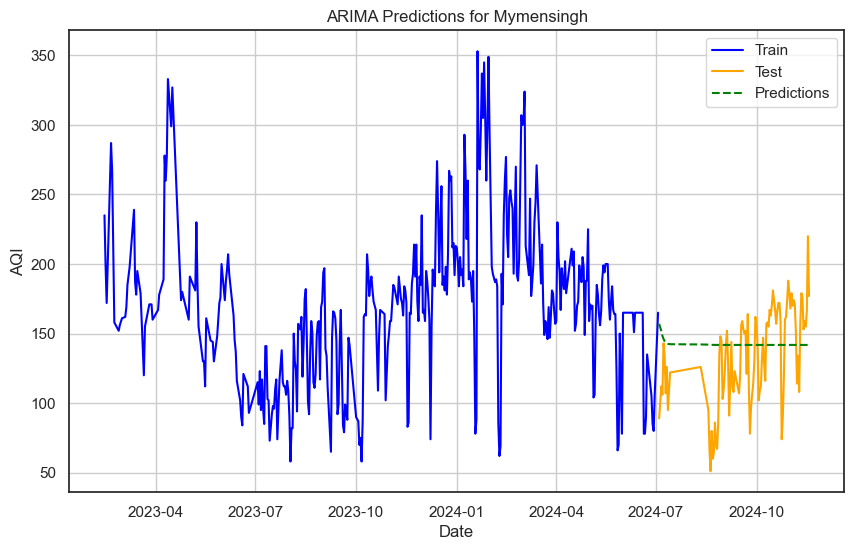

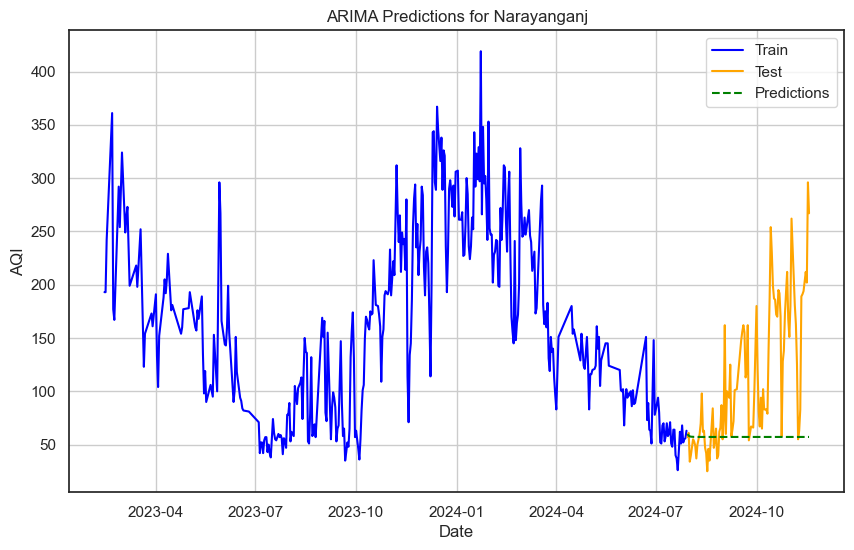

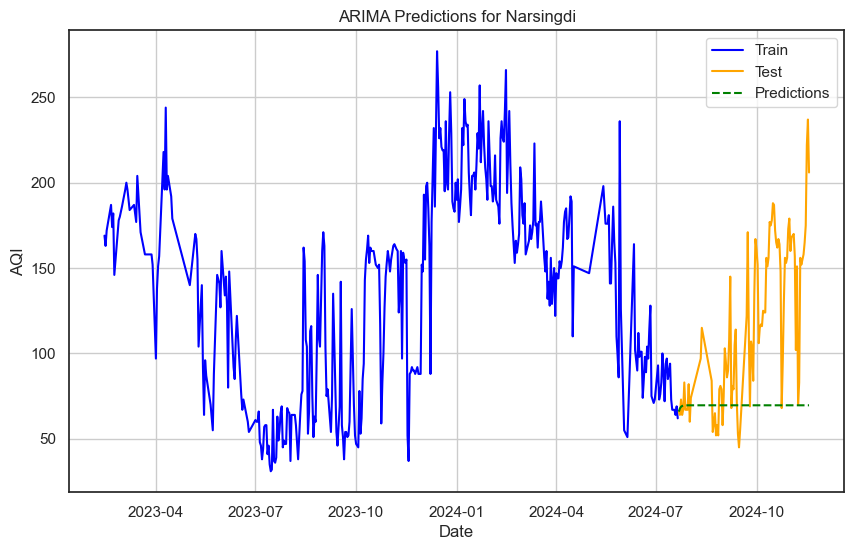

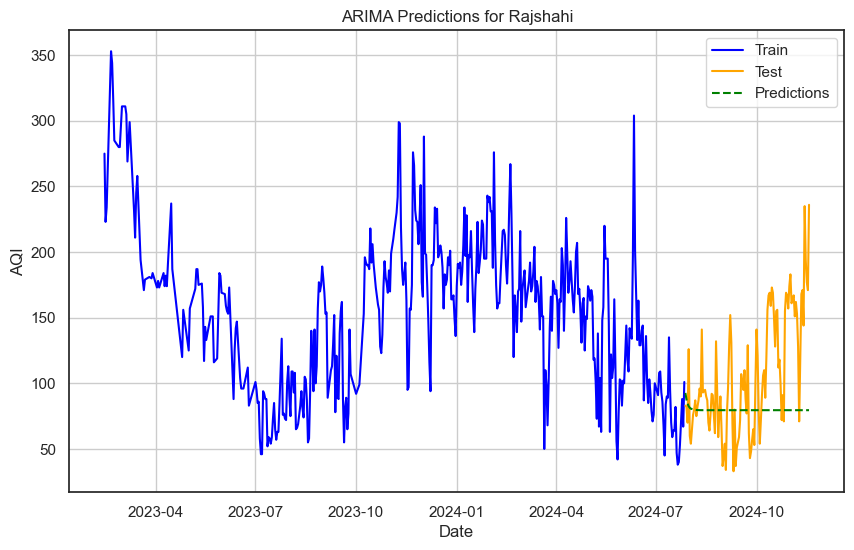

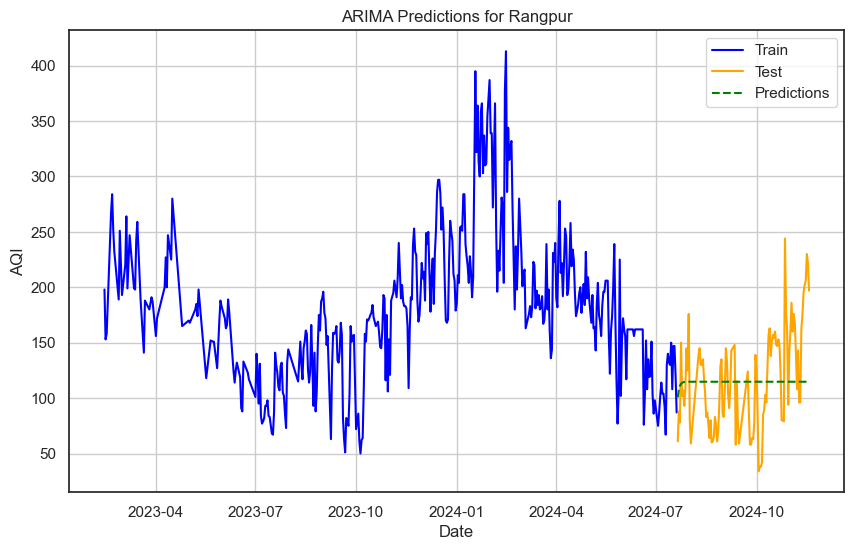

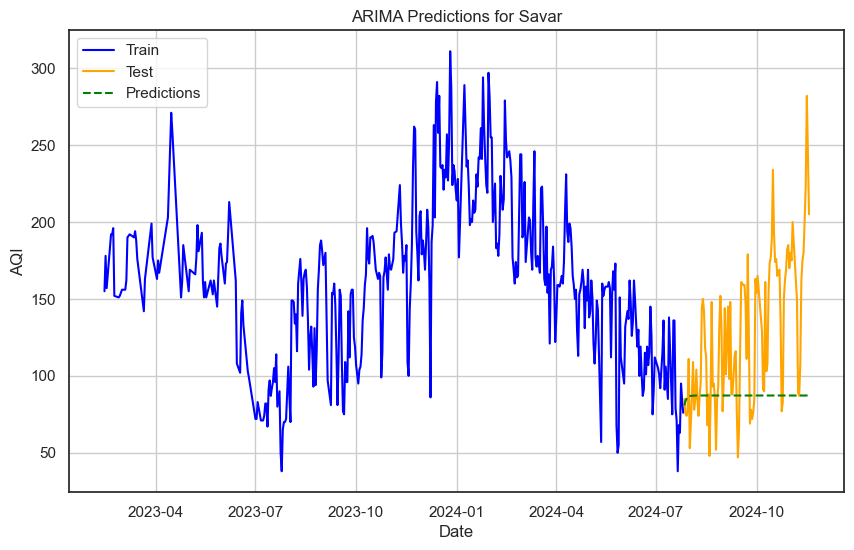

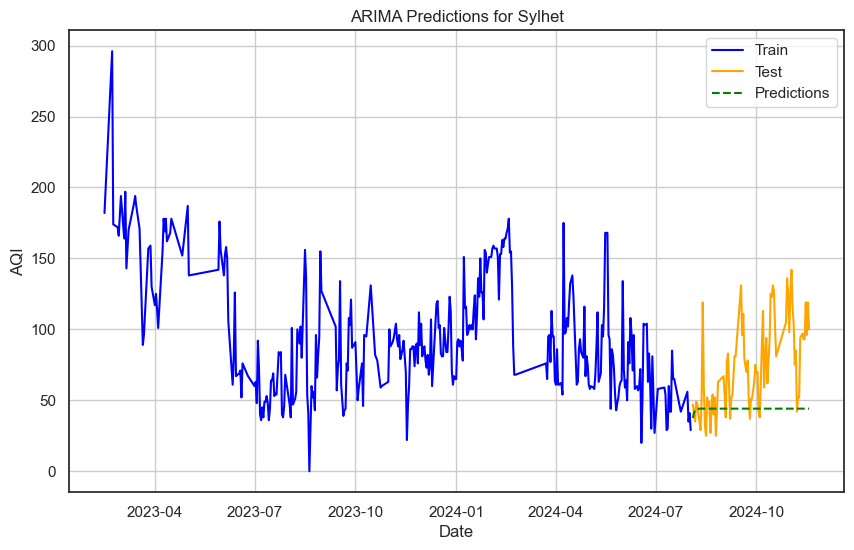

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Ensure the 'Date' column is in datetime format and sorted
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Iterate over each city to train the ARIMA model and visualize
for city, city_data in df.groupby('City'):
    try:
        city_data = city_data.sort_values('Date')
        city_data.set_index('Date', inplace=True)
        
        # Split data into training and testing sets
        train_size = int(len(city_data) * 0.8)  # 80% train, 20% test
        train, test = city_data['AQI'][:train_size], city_data['AQI'][train_size:]
        
        # Fit ARIMA model on training data
        model = ARIMA(train, order=(1, 1, 1))
        model_fit = model.fit()
        
        # Forecast for the test data
        predictions = model_fit.forecast(steps=len(test))
        
        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(train.index, train, label="Train", color="blue")
        plt.plot(test.index, test, label="Test", color="orange")
        plt.plot(test.index, predictions, label="Predictions", color="green", linestyle='--')
        
        plt.title(f"ARIMA Predictions for {city}")
        plt.xlabel("Date")
        plt.ylabel("AQI")
        plt.legend()
        plt.grid()
        plt.show()
        
    except Exception as e:
        print(f"Error processing city {city}: {e}")
